In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reexport = pd.read_csv('../data/cleaned_data/clean_reexport.csv')

reexport.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,European Union,154378800,148118400,160308000,162914400,163447200,156326400,167068800,172314000,175928400,...,235879200,237790800,245293200,244911600,258814800,259182000,275047200,267195600,281343600,288205200
1,Austria,6768000,7408800,7941600,6609600,5101200,4431600,4356000,4658400,4654800,...,4928400,5227200,5612400,5598000,5490000,5446800,5382000,5256000,5144400,5212800
2,Belgium,0,0,0,0,0,0,0,0,0,...,21326400,20980800,20404800,19807200,18763200,19922400,21787200,20437200,20671200,22316400
3,Belgium/Luxembourg,7254000,6285600,6580800,7426800,8143200,8643600,9093600,9158400,12888000,...,0,0,0,0,0,0,0,0,0,0
4,Bulgaria,964800,720000,655200,1429200,1666800,1854000,979200,1058400,1231200,...,1900800,1735200,2016000,2192400,2235600,2455200,2804400,2545200,2653200,2826000


In [3]:
# adding a column for Total export    
reexport['Total_reexport'] = reexport.iloc[:, 2:31].sum(axis=1)

In [4]:
total_reexport = reexport[['Country', 'Total_reexport']].sort_values(by=['Total_reexport'],
                                                                                        ascending=False)
total_reexport.head(20)

,Country,Total_reexport
0,European Union,6146010000
35,United States of America,2474834400
12,Germany,1839668400
16,Italy,777456000
29,Japan,726177600
11,France,695667600
27,Spain,459446400
34,United Kingdom,393454800
2,Belgium,374432400
21,Netherlands,345823200


In [5]:
total_reexport["Country"]

0               European Union
35    United States of America
12                     Germany
16                       Italy
29                       Japan
11                      France
27                       Spain
34              United Kingdom
2                      Belgium
21                 Netherlands
31          Russian Federation
22                      Poland
32                 Switzerland
28                      Sweden
1                      Austria
10                     Finland
7                      Czechia
8                      Denmark
13                      Greece
23                    Portugal
24                     Romania
14                     Hungary
30                      Norway
3           Belgium/Luxembourg
25                    Slovakia
4                     Bulgaria
5                      Croatia
33                     Tunisia
18                   Lithuania
19                  Luxembourg
26                    Slovenia
15                     Ireland
9       

In [6]:
#looking for Top 5 producers
top5_reexport = reexport[['Country', 'Total_reexport']].sort_values(by=['Total_reexport'],
                                                                                        ascending=False).head(5)
top5_reexport

,Country,Total_reexport
0,European Union,6146010000
35,United States of America,2474834400
12,Germany,1839668400
16,Italy,777456000
29,Japan,726177600


In [7]:
top5_reexport.dtypes

Country           object
Total_reexport     int64
dtype: object

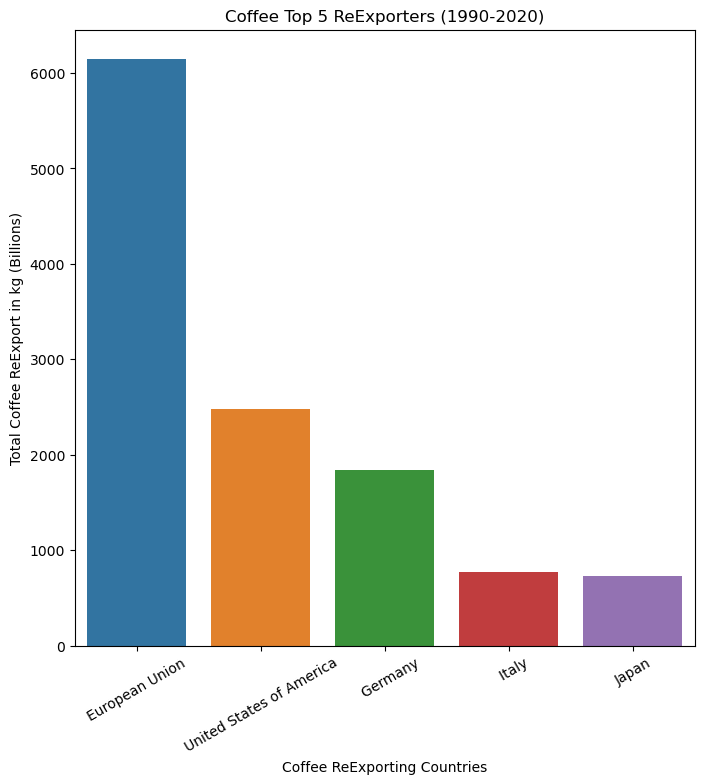

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Country",
           y=top5_reexport["Total_reexport"]/1000000 ,
           data=top5_reexport,
           errorbar=None,
#           hue="Coffee type"
           )
ax.set_ylabel("Total Coffee ReExport in kg (Billions)")
ax.set_xlabel("Coffee ReExporting Countries")
ax.set_title("Coffee Top 5 ReExporters (1990-2020)")
ax.xaxis.set_tick_params(rotation=30);

fig.savefig("../images/top5_reexport.png")

In [9]:
#Create df of export with only top 5 countries
reexport_time = reexport[reexport['Country'].isin(top5_reexport['Country'])]
#transpose df, making sure to sort values
reexport_time = reexport_time.sort_values(by=['Total_reexport'],ascending=False).T
#drop the non-numeric and totals rows
reexport_time.drop(['Country', 'Total_reexport'], axis=0, inplace=True)
# use top 5 country names
reexport_time.columns = top5_reexport['Country'].values
#set index name 
reexport_time.index.name = 'Year'
#reset the index
reexport_time.reset_index()
reexport_time

,European Union,United States of America,Germany,Italy,Japan
Year,,,,,
1990,154378800,75625200,49215600,18871200,19188000
1991,148118400,71424000,47624400,16668000,19836000
1992,160308000,82580400,49640400,16542000,19173600
1993,162914400,69584400,50785200,20138400,20487600
1994,163447200,58215600,48898800,19994400,22381200
1995,156326400,61585200,46267200,19396800,19760400
1996,167068800,70002000,48625200,20188800,21578400
1997,172314000,73234800,50058000,20674800,21315600
1998,175928400,75708000,49464000,21200400,21697200


In [10]:
reexport_time["United States of America"].sum()

2550459600

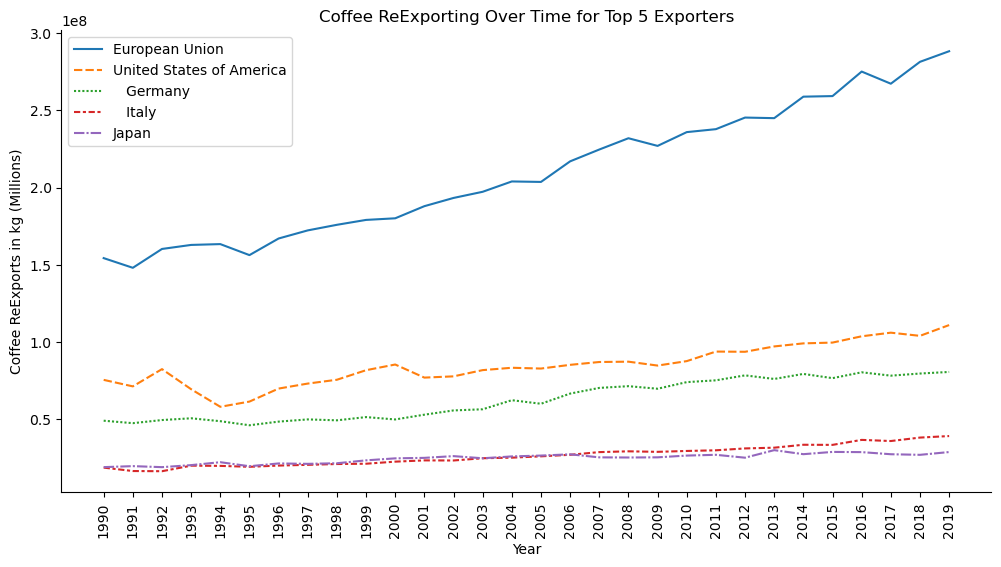

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=reexport_time,
            )
ax.set_title("Coffee ReExporting Over Time for Top 5 Exporters")
ax.set_ylabel("Coffee ReExports in kg (Millions)")
ax.xaxis.set_tick_params(rotation=90)
sns.despine();

fig.savefig("../images/top5_reexport_over_time.png")